<a href="https://colab.research.google.com/github/aysegullkadiroglu/techcareer-ml-bootcamp/blob/main/lecture-notes/Techcareer_01_10_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DBSCAN**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

Temelde y_true, kümeleme algoritmalarının doğruluğunu değerlendirmek için bir kıyaslama sağlar ve özellikle bir veri kümesinin doğru etiketlerine erişiminizin olduğu denetimli değerlendirme senaryolarında kullanışlıdır.

# *Veri Modelleme*

['y', 'b', 'g', 'r']


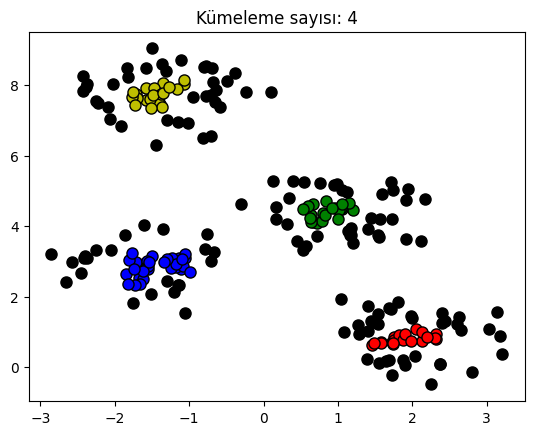

In [3]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X) # X veri kümesi DBSCAN üzerinde uygulanır.
core_samples = np.zeros_like(db.labels_, dtype=bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # küme sayısını belirler.
uniq_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)

for k, col in zip(uniq_labels, colors):
  if k == -1:
    col='k'
  class_member_ara = (labels == k)

  xy = X[class_member_ara & core_samples]

  plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=col, markeredgecolor='k',
           markersize=8)

noise_mask = (labels == -1)
noise_points = X[noise_mask]
plt.plot(noise_points[:,0], noise_points[:,1], 'o', markerfacecolor='black',
         markeredgecolor='black', markersize=8, label='gürültü')
plt.title('Kümeleme sayısı: %d' % n_clusters_)
plt.show()

In [4]:
silhouette = metrics.silhouette_score(X, labels)
print('Silhouette Score: %0.2f' % silhouette)

adjusted_rand = metrics.adjusted_rand_score(y_true, labels)
print('Adjusted Rand Score: %0.2f' % adjusted_rand)

Silhouette Score: 0.13
Adjusted Rand Score: 0.31
